# Project: Wrangling and Analyze Data

In [1]:
# importing data analysis modules
# hiddentoken contains my API tokens.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import tweepy
import json 
%matplotlib inline
from timeit import default_timer as timer
import hiddentoken

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. 


**Note:** the methods required to gather each data are different.


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# load tweet_archives data
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# display the tweet_archive dataframe
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#download data from url
response = requests.get(url)

# create a file named image-predictions to write
# the data in response.content
with open('image-predictions.tsv', 'w') as file:
    file.write(response.text)

In [4]:
# load image_prediction data
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# display the image_prediction dataframe
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# extracting tweet_id from tweet_archive table to use in API call
target_ids = tweet_archive.tweet_id.values

In [8]:
# calling my API token values
auth_keys = hiddentoken.oauth()
consumer_key = auth_keys['consumer_key']
consumer_secret = auth_keys['consumer_secret']
access_token = auth_keys['access_token']
access_token_secret = auth_keys['access_token_secret']

# creating authetication 
auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret,
                               access_token, access_token_secret)

# connecting to twitter 
api = tweepy.API(auth, wait_on_rate_limit=True)

In [10]:
# get the tweet status of one tweet_id to view the
# content of the tweet object returned

tweet_object = api.get_status(891327558926688256, tweet_mode='extended')

In [11]:
# display content of the returned tweet oject
tweet_object

Status(_api=<tweepy.api.API object at 0x000002D330BD9320>, _json={'created_at': 'Sat Jul 29 16:00:24 +0000 2017', 'id': 891327558926688256, 'id_str': '891327558926688256', 'full_text': 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f', 'truncated': False, 'display_text_range': [0, 138], 'entities': {'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'url': 'https://t.co/AtUZn91f7f', 'display_url': 'pic.twitter.com/AtUZn91f7f', 'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 720, 'h': 540, 'resize': 'fit'}, 'large': {'w':

In [9]:
# writing the tweet_oject results to file 
count = 0 
failed_id = {}
start = timer()
# create file tweet_json.txt with append mode
with open('tweet_json.txt', 'a') as file:
    for tweet_id in target_ids:
        count += 1
        try:
            # get tweet json object with tweet_id
            tweet_data = api.get_status(tweet_id, tweet_mode='extended')
            # save json object to file and write to memory
            json.dump(tweet_data._json, file)
            file.write('\n')
        # raise error for tweet_id not able to retrieve
        except tweepy.errors.TweepyException as e:
            # save the tweet_id and error message
            failed_id[tweet_id] = e 
            pass

end = timer()
print(end - start)
print(failed_id)

Rate limit reached. Sleeping for: 249
Rate limit reached. Sleeping for: 189


2232.5907189
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.',), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.',), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.',), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.',), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.',), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.',), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.',), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.',), 856330835276025856: NotFound('404 Not Found\n144 - No status found with that ID.',), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.',), 851861385021730816: NotFound('404 Not Found\n144 - No status found with that ID.',), 845459076796616705: NotFound('404 Not Found\n144 - 

In [7]:
# extracting tweet_id 
# retweet_count and favorite_count 

# empty list to store tweet status dictionary
tweet_extra = []
with open('tweet_json.txt', 'r') as file:
     # read each JSON status
    for line in file:
        # convert json status object to a python dictionary
        tweet_content = json.loads(line)
        # get value for tweet_id in dictionary
        tweet_id = tweet_content['id']
        # get value for retweet_count in dictionary
        retweet_count = tweet_content['retweet_count']
        # get value for favorite_count in dictionary
        favorite_count = tweet_content['favorite_count']
        tweet_extra.append({'tweet_id':tweet_id,
                           'retweet_count':retweet_count,
                           'favorite_count':favorite_count})

In [8]:
# creating dataframe for tweet_extra
tweet_extension = pd.DataFrame(tweet_extra)

In [9]:
tweet_extension.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33811
1,892177421306343426,5302,29330
2,891815181378084864,3481,22055
3,891689557279858688,7227,36938
4,891327558926688256,7762,35310


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Visual Assessment

In this section we will look at the datasets to visually assess and aquaint ourselves with the data available in the datasets that was gathered from the various sources.

#### Tweet_archive table

In [10]:
# viewing the tweet_archive dataframe
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


`tweet_archive` columns description:

- **tweet_id**: unique indentifier for each tweet.
- **in_reply_to_status_id**: This field will contain an integer if tweet is a reply to tweet by another author.
- **in_reply_to_user_id**: this field will contain an integer if tweet is a reply to another author.
- **timestamp**: time tweet was posted.
- **source**: utility used to post the tweet, as an HTML-formatted string e.g Twitter for iPhone.
- **text**: UTF-8 string of tweet
- **retweeted_status_id**: if the represented tweet is a retweet,this field will contain the integer representation of the original tweet's id.
- **retweeted_status_user_id**: if the represented tweet is a retweet,this field will contain the integer representation of the original tweet author's id.
- **retweeted_status_timestamp**: time of retweet
- **expanded_urls**: tweet URL
- **rating_numerator**:numerator of a dog rating. Note: ratings are almost always greater than 10
- **rating_denominator**:denominator of a dog rating. Note: ratings almost always have a denominator of 10
- **name**: name of the dog
- **doggo**: dog growth stage 
- **floofer**: dog growth stage
- **pupper**: dog growth stage
- **puppo**: dog growth stage

#### Image_prediction table

In [11]:
# viewing the image_prediction dataframe
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


`image_prediction` columns description:
- **tweet_id**: the unique identifier for each tweet

- **jpg_url**: Url of image attached to tweet

- **img_num**: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)

- **p1**: algorithm's #1 prediction for the image in the tweet

- **p1_conf**: how confident the algorithm is in its #1 prediction

- **p1_dog**: whether or not the #1 prediction is a breed of dog

- **p2**: algorithm's #2 prediction for the image in the tweet

- **p2_conf**: how confident the algorithm is in its #2 prediction

- **p2_dog**: whether or not the #2 prediction is a breed of dog

- **p3**: algorithm's #3 prediction for the image in the tweet

- **p3_conf**: how confident the algorithm is in its #3 prediction

- **p3_dog**: whether or not the #3 prediction is a breed of dog

#### Tweet_extension table

In [12]:
# viewing the tweet_extension dataframe
tweet_extension

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33811
1,892177421306343426,5302,29330
2,891815181378084864,3481,22055
3,891689557279858688,7227,36938
4,891327558926688256,7762,35310
5,891087950875897856,2599,17793
6,890971913173991426,1664,10364
7,890729181411237888,15756,56871
8,890609185150312448,3622,24524
9,890240255349198849,6101,27963


`tweet_extension` columns description:
- **id**: the unique identifier for each tweet

- **retweet_count**: the number of times an originally authored tweet was retweeted

- **favorite_count**: the number of times an originally authored tweet was liked

#### Programmatic Assessment

In this section we will use code to view specific parts of the datasets.

In [13]:
# display concise summary of our tweet_archive data
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# display concise summary of our image_prediction data
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# display concise summary of our tweet_extension data
tweet_extension.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [16]:
# statistical description of tweet_archive dataframe
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# statistical description of image_prediction dataframe
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
# statistical description of tweet_extension dataframe
tweet_extension.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2471.706489,7054.840138
std,6.820795e+16,4185.736038,10963.779170
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,494.500000,1225.500000
50%,7.178418e+17,1149.000000,3050.000000
75%,7.986547e+17,2861.500000,8605.500000
max,8.924206e+17,70752.000000,144907.000000


In [19]:
# display samples of tweet_archive data
tweet_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2148,669749430875258880,NaN,NaN,2015-11-26 05:28:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. Clarence thought he saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669749430...,8,10,Clarence,None,None,None,None
793,773547596996571136,NaN,NaN,2016-09-07 15:44:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chelsea. She forgot how to dog. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773547596...,11,10,Chelsea,None,None,pupper,None
1280,708834316713893888,NaN,NaN,2016-03-13 01:57:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Malikai. He was rolling around having fun...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708834316...,10,10,Malikai,None,None,None,None
624,795464331001561088,NaN,NaN,2016-11-07 03:14:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,None,None,None


In [20]:
# display samples of image_prediction data
image_prediction.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1845,838921590096166913,https://pbs.twimg.com/media/C6Ryuf7UoAAFX4a.jpg,1,Border_terrier,0.664538,True,Brabancon_griffon,0.170451,True,Yorkshire_terrier,0.087824,True
1312,754482103782404096,https://pbs.twimg.com/ext_tw_video_thumb/75448...,1,tub,0.596796,False,bathtub,0.381098,False,shower_curtain,0.017629,False
397,673662677122719744,https://pbs.twimg.com/media/CVlUfBbUwAQyfcD.jpg,1,Labrador_retriever,0.957670,True,beagle,0.012413,True,golden_retriever,0.005689,True
1338,758467244762497024,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True


In [21]:
# display samples of tweet_extension data
tweet_extension.sample(4)

,tweet_id,retweet_count,favorite_count
131,866094527597207552,7172,0
1367,699801817392291840,851,2782
1372,699446877801091073,2402,5522
2095,670374371102445568,238,669


In [22]:
# checking the dimension of tweet_archive dataframe
tweet_archive.shape

(2356, 17)

In [23]:
# checking the dimension of image_prediction dataframe
image_prediction.shape

(2075, 12)

In [24]:
# checking the dimension of tweet_extension dataframe
tweet_extension.shape

(2327, 3)

In [25]:
# checking for unique values in tweet_archive dataframe
tweet_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [26]:
# checking for unique values in image_prediction dataframe
image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [27]:
# checking for unique values in p1 column of image_prediction dataframe
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
tiger_shark             1
cliff                   1
polecat                 1
barbell                 1
jersey                  1
Name: p1, Length: 378, dtype: int64

In [28]:
# checking for value count in p1 column of image_prediction dataframe
image_prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
sock                    1
printer                 1
sarong                  1
spotted_salamander      1
rain_barrel             1
Name: p2, Length: 405, dtype: int64

In [29]:
# checking for unique values in tweet_extension dataframe
tweet_extension.nunique()

tweet_id          2327
retweet_count     1671
favorite_count    1984
dtype: int64

In [30]:
# checking for null values in tweet_archive dataframe
tweet_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [31]:
# checking for null values in image_prediction dataframe
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [32]:
# checking for null values in tweet_extension dataframe
tweet_extension.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [33]:
# checking for duplicates in tweet_archive dataframe
tweet_archive.duplicated().sum()

0

In [34]:
# checking for duplicates in image_prediction dataframe
image_prediction.duplicated().sum()

0

In [35]:
# checking for duplicates in tweet_extension dataframe
tweet_extension.duplicated().sum()

0

In [36]:
# display the values in the name column of the tweet_archive dataframe
tweet_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Robin         1
Sky           1
Mason         1
Gòrdón        1
Sundance      1
Name: name, Length: 957, dtype: int64

In [37]:
# display the values in the doggo column of the tweet_archive dataframe
tweet_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [38]:
# display the values in the floofer column of the tweet_archive dataframe
tweet_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [39]:
# display the values in the pupper column of the tweet_archive dataframe
tweet_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [40]:
# display the values in the puppo column of the tweet_archive dataframe
tweet_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [41]:
# checking for duplicate columns 
all_columns = pd.Series(list(tweet_archive) + list(image_prediction) + list(tweet_extension))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [42]:
# display snapshot of retweets in the tweet_archive
tweet_archive[tweet_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


### Quality issues


`tweet_achive` table


1. Missing data        in`in_reply_to_status_id`,`in_reply_to_user_id`,`doggo`,`floofer`,`pupper`,`puppo`, `expanded_urls`columns. Multiple NaN values.


2. retweets are present. `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` contain non-null values 


3. Erroneous data types (`timestamp` column values are object type instead of datatime type) 


4. The name column has many invalid values like  a, an, the


`image_prediction` table

5. Non descriptive column names (`jpg_url`, `img_num`,`p1`,`p2`,`p3`,`p1_dog`,`p2_dog`, `p3_dog`,`p1_conf`,`p2_conf`,`p3_conf`) 


6. Not all tweet images are dog images (False values are present in `p1_dog`,`p2_dog`, `p3_dog` column


7. Erratic values (`p2_conf` and `p3_conf` columns). 


8. data in the `p1`,`p2` and `p3` columns in `image_prediction` table all lowercase and uppercase

### Tidiness issues


1. Dog stage observations (doggo, poppo, pupper,floofer) are used as columns `twitter_archive` table


2. Tweet_id column in `tweet_archive` is duplicated in `image_prediction` and `tweet_extension` tables

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [43]:
# Make copies of original pieces of data
tweet_archive_clean=tweet_archive.copy()
image_prediction_clean=image_prediction.copy()
tweet_extension_clean=tweet_extension.copy()

### Quality Issue #1:


`tweet_archive` table



Missing data in `in_reply_to_status_id`,`in_reply_to_user_id`,`doggo`,`floofer`,`pupper`,`puppo`,`name`, `expanded_urls`columns. Multiple NaN values.

#### Define:
- Use pandas DataFrame `drop` method to delete `in_reply_to_status_id`,`name`, `expanded_urls` and `in_reply_to_user_id` columns since it contains too many NaN values and will not be useful in the analysis.

- Use pandas DataFrame `replace` method to replace None values in`doggo`,`floofer`,`pupper` and `puppo` columns with NaN values to make anaylsis with it values accessible

#### Code

In [44]:
# Deleting the in_reply_to_status_id expanded_url,name and in_reply_to_user_id from tweet_archive_clean DataFrame
tweet_archive_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','expanded_urls'], inplace=True)

# replacing none values in tweet_archive_clean DataFrame with NaN 
tweet_archive_clean.doggo.replace(to_replace='None', value=np.nan, inplace=True)
tweet_archive_clean.floofer.replace(to_replace='None', value=np.nan, inplace=True)
tweet_archive_clean.pupper.replace(to_replace='None', value=np.nan, inplace=True)
tweet_archive_clean.puppo.replace(to_replace='None', value=np.nan, inplace=True)

#### Test

In [45]:
# checking that the columns have been deleted properly
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


After cleaning completeness quality issues its best practice to clean Tidiness issues before going further with cleaning other quality issues.

### Tidiness Issue #1 :


`twitter_archives` table


- Dog growth stage observations (doggo, poppo, pupper,floofer) are used as columns.

#### Define
- Use pandas `melt` method to unpivot the observations from a wide format to a long format by creating a growth_stage and dog_stage column.


- Then use DataFrame `drop` method to delete the growth_stage column because it adds unique identifiers for resulting the duplicates in the dataset created by the melt.


- Then use DataFrame `drop_duplicates` method to delete the resulting duplicate rows.

#### Code

In [46]:
# convert the doggo,floofer,pupper and puppo columns to rows 
tweet_archive_clean = pd.melt(tweet_archive_clean,
                              ['tweet_id','timestamp','source','text',
                               'retweeted_status_id','retweeted_status_user_id',
                               'retweeted_status_timestamp',
                               'rating_numerator','rating_denominator','name'],
                              var_name='growth_stages',value_name='dog_stage')

# delete the growth_stages column with values of the previous 
tweet_archive_clean.drop(columns='growth_stages', inplace=True)
tweet_archive_clean.drop_duplicates(inplace=True)

#### Test

In [47]:
# checking the dimension of the dataframe
tweet_archive_clean.shape

(2750, 11)

In [48]:
# checking for duplicates
tweet_archive_clean.duplicated().sum()

0

In [49]:
# display concise summary of the dataframe
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 8151
Data columns (total 11 columns):
tweet_id                      2750 non-null int64
timestamp                     2750 non-null object
source                        2750 non-null object
text                          2750 non-null object
retweeted_status_id           219 non-null float64
retweeted_status_user_id      219 non-null float64
retweeted_status_timestamp    219 non-null object
rating_numerator              2750 non-null int64
rating_denominator            2750 non-null int64
name                          2750 non-null object
dog_stage                     394 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 257.8+ KB


### Tidiness Issue #2:

- tweet_id column in `tweet_archives` is duplicated in `image_predict` and `tweet_extension` tables

#### Define

- Use pandas `merge` method to `outer` merge the `tweet_archive` table with `tweet_extension` table on tweet_id column to form `master_archive1` table.


- Then use pandas `merge` method to `outer` merge the `master_archive1` table with `image_prediciton` table to form `tweet_master_archive` table. 

#### Code

In [50]:
# merging the tweet_archive_clean table with tweet_extension table
master_archive1 = tweet_archive_clean.merge(tweet_extension_clean, how='inner', on='tweet_id')

# merging the master_archive1 table with image_prediction table
tweet_master_archive = master_archive1.merge(image_prediction_clean, how='inner', on='tweet_id')

#### Test

In [51]:
# display concise summary of the dataframe
tweet_master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2388 entries, 0 to 2387
Data columns (total 24 columns):
tweet_id                      2388 non-null int64
timestamp                     2388 non-null object
source                        2388 non-null object
text                          2388 non-null object
retweeted_status_id           86 non-null float64
retweeted_status_user_id      86 non-null float64
retweeted_status_timestamp    86 non-null object
rating_numerator              2388 non-null int64
rating_denominator            2388 non-null int64
name                          2388 non-null object
dog_stage                     331 non-null object
retweet_count                 2388 non-null int64
favorite_count                2388 non-null int64
jpg_url                       2388 non-null object
img_num                       2388 non-null int64
p1                            2388 non-null object
p1_conf                       2388 non-null float64
p1_dog                        2388 n

### Quality Issue #2:
retweets are present in `tweet_archives` table (`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` have non-null values)

#### Define

- Use pandas `loc` method and a `mask` of the null values in the retweeted_statue_id column to delete rows of retweets since all retweeted_ columns have the same number of non-null value.


- Use pandas `drop` method to delete all retweeted_  columns

#### Code

In [52]:
# indexing to select only rows without retweet_status_id
tweet_master_archive = tweet_master_archive.loc[tweet_master_archive['retweeted_status_id'].isnull(),:]

# creating a list of retweeted_ column labels in the dataframe
column_labels = ['retweeted_status_id','retweeted_status_user_id',
                 'retweeted_status_timestamp']

# deleting all retweeted_ columns
tweet_master_archive.drop(columns=column_labels, inplace=True)

#### Test

In [53]:
# Display concise summary of the dataframe
tweet_master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2302 entries, 0 to 2387
Data columns (total 21 columns):
tweet_id              2302 non-null int64
timestamp             2302 non-null object
source                2302 non-null object
text                  2302 non-null object
rating_numerator      2302 non-null int64
rating_denominator    2302 non-null int64
name                  2302 non-null object
dog_stage             316 non-null object
retweet_count         2302 non-null int64
favorite_count        2302 non-null int64
jpg_url               2302 non-null object
img_num               2302 non-null int64
p1                    2302 non-null object
p1_conf               2302 non-null float64
p1_dog                2302 non-null bool
p2                    2302 non-null object
p2_conf               2302 non-null float64
p2_dog                2302 non-null bool
p3                    2302 non-null object
p3_conf               2302 non-null float64
p3_dog                2302 non-null bool


### Quality Issue #3
- Erroneous data types (`timestamp` column values are object type instead of datatime type)

#### Define
- Use pandas `to_datetime` to covert values in the `timestamp` column to the valid type
- Then seperate the timestamp values in `date` and `time` columns
- Then covert the resulting `date` and `time` to datetime datatype

#### Code

In [54]:
# converting the values of the timestamp column to valid time format
tweet_master_archive['timestamp'] = pd.to_datetime(tweet_master_archive.timestamp)


# creating columns in tweet_master_archive dataframe for date and time_of_day 
# with values from timestamp column of the tweet_master_archive dataframe  
tweet_master_archive['date'] = pd.to_datetime(tweet_master_archive['timestamp']).dt.date
tweet_master_archive['time_of_day'] = pd.to_datetime(tweet_master_archive['timestamp']).dt.time
tweet_master_archive['hour'] = pd.to_datetime(tweet_master_archive['timestamp']).dt.hour

# converting the values of the date and time_of_day column to valid time format
tweet_master_archive['date']= pd.to_datetime(tweet_master_archive['date'])

#### Test

In [55]:
# checking the value type of timestamp is corrected
tweet_master_archive.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
dog_stage                          object
retweet_count                       int64
favorite_count                      int64
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
date                       datetime64[ns]
time_of_day                        object
hour                              

### Quality Issue #4:

- The `name` column has many invalid values like  a, an, the

#### Define

- Use `for` loop to select the invalid names. 
- Then use `replace` method to replace the invalid names with None

#### Code

In [56]:
# Create a list to contain all the names that starts with lowercase
notName = []

for nam in tweet_master_archive.name:
    if nam.islower() and nam not in notName:
        notName.append(nam)
        
print(notName)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [57]:
# replace the invalid names with the None
tweet_master_archive.name.replace(notName, 'None', inplace=True)

#### Test

In [58]:
# Checking if the invalid names are still in the name column 
for nam in tweet_master_archive.name:
    if nam.islower():
        print(nam)

In [59]:
tweet_master_archive.name.sample(4)

1887     Zuzu
2043     Rolf
943       Blu
1591    Olive
Name: name, dtype: object

### Quality Issue #5:
- Non descriptive column names in `image_prediction` table (`jpg_url`, `img_num`,`p1`,`p2`,`p3`,`p1_dog`,`p2_dog`, `p3_dog`,`p1_conf`,`p2_conf`,`p3_conf`)


#### Define
- create a dictionary with non-descriptive names as key and descriptive names as values
- Then use pandas DataFrame `rename` method to change the specific column names

#### Code

In [60]:
# creating dictionary for description names to replace non-descriptive columns names
# in tweet_master_archive dataframe

descriptive_name = {'jpg_url':'tweet_image_url',
                   'img_num':'tweet_image_number',
                   'p1':'tweet_image_prediction_1',
                   'p2':'tweet_image_prediction_2',
                   'p3':'tweet_image_prediction_3',
                   'p1_dog':'is_image_prediction_1_dog_breed',
                   'p2_dog':'is_image_prediction_2_dog_breed',
                   'p3_dog':'is_image_prediction_3_dog_breed',
                   'p1_conf':'prediction_1_percentage_confidence',
                   'p2_conf':'prediction_2_percentage_confidence',
                   'p3_conf':'prediction_3_percentage_confidence'}

# rename non-descriptive columns names in tweet_master_archive dataframe 
tweet_master_archive.rename(columns=descriptive_name, inplace=True)

#### Test

In [61]:
# Dispaly concise summary of the tweet_master_archive dataframe
tweet_master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2302 entries, 0 to 2387
Data columns (total 24 columns):
tweet_id                              2302 non-null int64
timestamp                             2302 non-null datetime64[ns, UTC]
source                                2302 non-null object
text                                  2302 non-null object
rating_numerator                      2302 non-null int64
rating_denominator                    2302 non-null int64
name                                  2302 non-null object
dog_stage                             316 non-null object
retweet_count                         2302 non-null int64
favorite_count                        2302 non-null int64
tweet_image_url                       2302 non-null object
tweet_image_number                    2302 non-null int64
tweet_image_prediction_1              2302 non-null object
prediction_1_percentage_confidence    2302 non-null float64
is_image_prediction_1_dog_breed       2302 non-null bool
twe

### Quality Issue #6:
- Erratic values in `image_prediction` table (`p2_conf` and `p3_conf` columns).

#### Code

- Use pandas `drop` method to drop the columns. We will be using only the algorithms #1 prediction for this analysis


- Then use pandas `drop` method to drop all associated columns 

In [62]:
# delete columns for prediction_confidence 2 and 3 in tweet_master_archive dataframe
tweet_master_archive.drop(columns=['prediction_2_percentage_confidence','prediction_3_percentage_confidence'], inplace=True)

# list of columns related to prediction_confidence 2 and 2 in tweet_master_archive dataframe
related_columns = ['tweet_image_prediction_2','is_image_prediction_2_dog_breed',
                   'tweet_image_prediction_3','is_image_prediction_3_dog_breed']
# deleting columns related to prediction_confidence 2 and 3
tweet_master_archive.drop(columns=related_columns, inplace=True)

#### Test

In [63]:
# display concise summary of tweet_master_archive dataframe
tweet_master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2302 entries, 0 to 2387
Data columns (total 18 columns):
tweet_id                              2302 non-null int64
timestamp                             2302 non-null datetime64[ns, UTC]
source                                2302 non-null object
text                                  2302 non-null object
rating_numerator                      2302 non-null int64
rating_denominator                    2302 non-null int64
name                                  2302 non-null object
dog_stage                             316 non-null object
retweet_count                         2302 non-null int64
favorite_count                        2302 non-null int64
tweet_image_url                       2302 non-null object
tweet_image_number                    2302 non-null int64
tweet_image_prediction_1              2302 non-null object
prediction_1_percentage_confidence    2302 non-null float64
is_image_prediction_1_dog_breed       2302 non-null bool
dat

### Quality Issue #7:

data in the `p1`,`p2` and `p3` columns in `image_prediction` table all lowercase and uppercase

#### Define

- Use `.str` `.lower` method to conver all values to lowercase

#### Code

In [64]:
# converting uppercase strings in tweet_image_prediction_1 column of tweet_master_archive dataframe
tweet_master_archive['tweet_image_prediction_1']=tweet_master_archive.tweet_image_prediction_1.str.lower()

#### Test

In [65]:
# display the values of tweet_image_prediction_1 column
tweet_master_archive['tweet_image_prediction_1']

0                       orange
1                    chihuahua
2                    chihuahua
3                  paper_towel
4                       basset
                 ...          
2383        miniature_pinscher
2384       rhodesian_ridgeback
2385           german_shepherd
2386                   redbone
2387    welsh_springer_spaniel
Name: tweet_image_prediction_1, Length: 2302, dtype: object

### Quality Issue #8:

- Not all tweet images are dog images (False values are present in `is_image_prediction_1_dog_breed` column

#### Define

- Use pandas DataFrame `loc` method to slice the dataframe and delete the row with False values in is_image_prediction_1_dog_breed column.

#### Code

In [66]:
# remove all rows of false dog breed prediction in the 
# is_image_prediction_1_dog_breed column in tweet_master dataframe
tweet_master_archive= tweet_master_archive.loc[tweet_master_archive['is_image_prediction_1_dog_breed']==True,:]

#### Test

In [67]:
# checking the count of values 
# in the is_image_prediction_1_dog_breed columns of tweet_master_archive dataframe
tweet_master_archive.is_image_prediction_1_dog_breed.value_counts()

True    1706
Name: is_image_prediction_1_dog_breed, dtype: int64

### Further assessing

In [68]:
# checking for null values in the dataset after the cleaning
tweet_master_archive.isnull().sum()

tweet_id                                 0
timestamp                                0
source                                   0
text                                     0
rating_numerator                         0
rating_denominator                       0
name                                     0
dog_stage                             1469
retweet_count                            0
favorite_count                           0
tweet_image_url                          0
tweet_image_number                       0
tweet_image_prediction_1                 0
prediction_1_percentage_confidence       0
is_image_prediction_1_dog_breed          0
date                                     0
time_of_day                              0
hour                                     0
dtype: int64

#### Futher issues cleaning

### Quality Issue #9:
- Missing data in `dog_stage` column (Null values exceed 10% of the dog stage record)


- Missing data in `favorite_count` and `retweet_count` columns



#### Define


- Use pandas `drop` method to delete the dog_stage column is it record cannot be used for unbaised analysis


- Use pandas DataFrame `replace` to replace the null values in favorite_count and retweet_count columns with zeros

In [69]:
# deleting the dog_stage column
tweet_master_archive.drop(columns='dog_stage', inplace=True)


# replacing null values in retweet_count column with 0
tweet_master_archive['retweet_count'].replace(to_replace=np.nan, value=0, inplace=True)

# replacing null values in favorite_count column with 0
tweet_master_archive['favorite_count'].replace(to_replace=np.nan, value=0, inplace=True)

#### Test

In [70]:
# Display concise summary of the dataframe
tweet_master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1706 entries, 1 to 2387
Data columns (total 17 columns):
tweet_id                              1706 non-null int64
timestamp                             1706 non-null datetime64[ns, UTC]
source                                1706 non-null object
text                                  1706 non-null object
rating_numerator                      1706 non-null int64
rating_denominator                    1706 non-null int64
name                                  1706 non-null object
retweet_count                         1706 non-null int64
favorite_count                        1706 non-null int64
tweet_image_url                       1706 non-null object
tweet_image_number                    1706 non-null int64
tweet_image_prediction_1              1706 non-null object
prediction_1_percentage_confidence    1706 non-null float64
is_image_prediction_1_dog_breed       1706 non-null bool
date                                  1706 non-null datetime6

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
# Save the master DataFrame to a file called 'twitter_archive_master.csv'
tweet_master_archive.to_csv('twitter_archive_master.csv', index=False)

In [72]:
# loading the file to DataFrame
tweet_df = pd.read_csv('twitter_archive_master.csv')

In [73]:
# display the loaded DataFrame to see the file was saved properly
tweet_df.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,tweet_image_url,tweet_image_number,tweet_image_prediction_1,prediction_1_percentage_confidence,is_image_prediction_1_dog_breed,date,time_of_day,hour
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,5302,29330,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,2017-08-01,00:17:27,0
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,3481,22055,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,2017-07-31,00:18:03,0
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,7762,35310,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,2017-07-29,16:00:24,16


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [74]:
tweet_df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,tweet_image_number,prediction_1_percentage_confidence,hour
count,1.706000e+03,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000
mean,7.422211e+17,11.536342,10.463072,2422.914420,8461.549824,1.223329,0.618588,9.886284
std,6.855721e+16,7.369440,6.375732,4702.921111,12863.836837,0.585209,0.259008,8.687806
min,6.660209e+17,1.000000,2.000000,11.000000,66.000000,1.000000,0.044333,0.000000
25%,6.797256e+17,10.000000,10.000000,553.000000,2011.500000,1.000000,0.399303,1.000000
50%,7.186224e+17,11.000000,10.000000,1188.500000,3950.000000,1.000000,0.621724,5.000000
75%,7.990311e+17,12.000000,10.000000,2636.250000,10282.250000,1.000000,0.853284,18.000000
max,8.921774e+17,165.000000,150.000000,70752.000000,144907.000000,4.000000,0.999956,23.000000


In [75]:
tweet_df.tweet_image_prediction_1.value_counts()

golden_retriever      175
labrador_retriever    109
pembroke              101
chihuahua              86
pug                    62
                     ... 
groenendael             1
standard_schnauzer      1
silky_terrier           1
entlebucher             1
japanese_spaniel        1
Name: tweet_image_prediction_1, Length: 111, dtype: int64

### Insights:

- The average hour that tweet get posted on [WeRateDogs](https://twitter.com/dog_rates?s=20&t=WVC6h7yzsvn6F21iUlaDOw) is approximately 10am UTC



- The average number of [WeRateDogs](https://twitter.com/dog_rates?s=20&t=WVC6h7yzsvn6F21iUlaDOw) tweet status engagement via likes (favorite_count) is approximately **8417** and the maximum is **144907**.


- The average number of [WeRateDogs](https://twitter.com/dog_rates?s=20&t=WVC6h7yzsvn6F21iUlaDOw) tweet status engagement via retweets (retweet_count) is approximately **2410** and the maximum is **70752**



- The average percentage confidence of the image prediction algorithm is approximately **62%**



- The most rated dog breed is the **Golden retriever**



### Visualization

### Question 1: What are the top 5 most rated dog breed? 

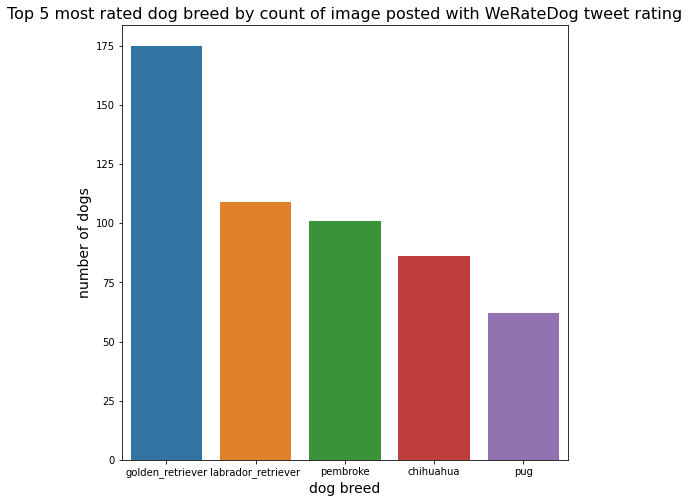

In [76]:
import seaborn as sns 
sorted_breed = tweet_df['tweet_image_prediction_1'].value_counts().head(5).index
fig = plt.figure(figsize=(8,8))
sns.countplot(data=tweet_df,x='tweet_image_prediction_1',order=sorted_breed, orient='h')
plt.xlabel('dog breed', fontsize=14)
plt.ylabel('number of dogs', fontsize=14)
plt.title('Top 5 most rated dog breed by count of image posted with WeRateDog tweet rating', fontsize=16)
plt.show()
    
                    

### Conclusion

As was mentioned earlier, most of the dog image attached to each rating tweet by [WeRateDogs](https://twitter.com/dog_rates?s=20&t=WVC6h7yzsvn6F21iUlaDOw) was passed through a neural network than can classify dog breed by predicting the breed of a dog in an image with an average prediction confidence of 62% and it was found that the five most rated dog breed by count of all tweet rating posted with a dog image were:
- golden retriever breed
- Labrador retriever breed
- pembroke breed
- chihuahua breed
- pug breed